In [91]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [92]:
df = pd.read_excel("data.xls")


In [93]:
# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()

time    0
pm25    0
dtype: int64

In [94]:
df.describe



<bound method NDFrame.describe of                     time  pm25
0    2019-07-01 18:30:26    19
1    2019-07-01 18:31:26    15
2    2019-07-01 18:32:26    13
3    2019-07-01 18:33:27    15
4    2019-07-01 18:34:27    15
...                  ...   ...
8191 2019-07-07 11:52:42    14
8192 2019-07-07 11:53:42    14
8193 2019-07-07 11:54:42    15
8194 2019-07-07 11:56:25    13
8195 2019-07-07 11:56:42    13

[8196 rows x 2 columns]>

In [95]:
test1=df[7500:]
test_xcoord = test1['time'].dt.time.to_numpy()
test_xcoord

array([datetime.time(0, 14, 34), datetime.time(0, 15, 34),
       datetime.time(0, 16, 34), datetime.time(0, 17, 34),
       datetime.time(0, 18, 34), datetime.time(0, 19, 34),
       datetime.time(0, 20, 34), datetime.time(0, 21, 34),
       datetime.time(0, 22, 34), datetime.time(0, 23, 34),
       datetime.time(0, 24, 33), datetime.time(0, 25, 33),
       datetime.time(0, 26, 33), datetime.time(0, 27, 33),
       datetime.time(0, 28, 33), datetime.time(0, 29, 33),
       datetime.time(0, 30, 33), datetime.time(0, 31, 33),
       datetime.time(0, 32, 33), datetime.time(0, 33, 33),
       datetime.time(0, 34, 33), datetime.time(0, 35, 33),
       datetime.time(0, 36, 33), datetime.time(0, 37, 33),
       datetime.time(0, 38, 33), datetime.time(0, 39, 33),
       datetime.time(0, 40, 33), datetime.time(0, 41, 33),
       datetime.time(0, 42, 33), datetime.time(0, 43, 33),
       datetime.time(0, 44, 33), datetime.time(0, 45, 33),
       datetime.time(0, 46, 33), datetime.time(0, 47, 33

In [96]:
#df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df.index
df.describe()
train=df[0:7500] 
test=df[7500:]
train.head()
df.index


DatetimeIndex(['2019-07-01 18:30:26', '2019-07-01 18:31:26',
               '2019-07-01 18:32:26', '2019-07-01 18:33:27',
               '2019-07-01 18:34:27', '2019-07-01 18:35:27',
               '2019-07-01 18:36:27', '2019-07-01 18:37:27',
               '2019-07-01 18:38:27', '2019-07-01 18:39:27',
               ...
               '2019-07-07 11:46:42', '2019-07-07 11:48:25',
               '2019-07-07 11:48:42', '2019-07-07 11:50:42',
               '2019-07-07 11:51:42', '2019-07-07 11:52:42',
               '2019-07-07 11:53:42', '2019-07-07 11:54:42',
               '2019-07-07 11:56:25', '2019-07-07 11:56:42'],
              dtype='datetime64[ns]', name='time', length=8196, freq=None)

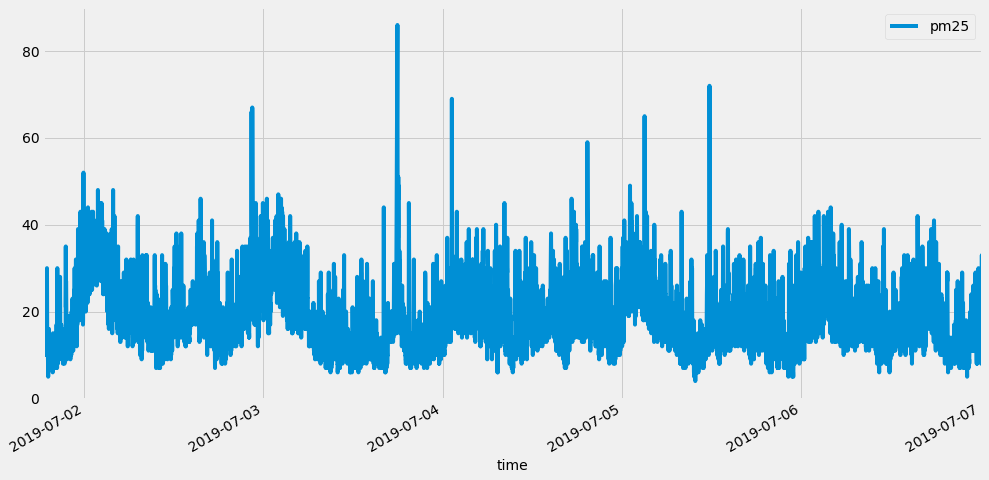

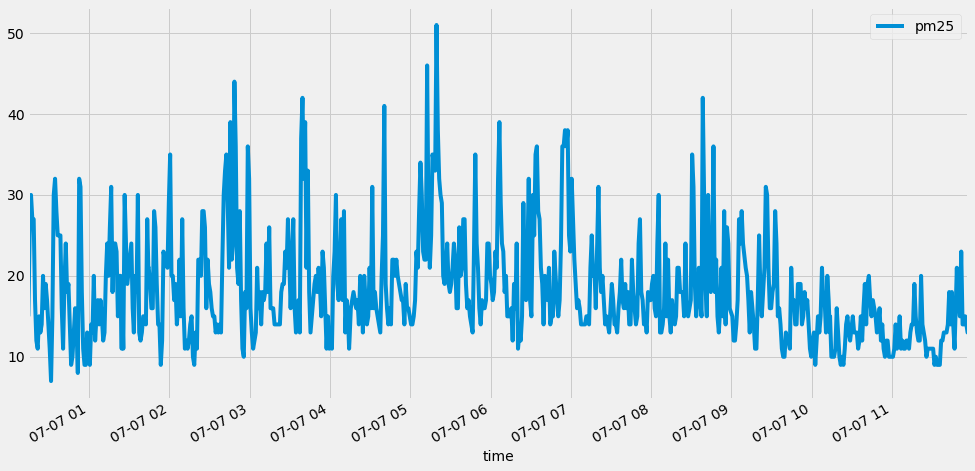

time
2019-07-01 18:30:26    19
2019-07-01 18:31:26    15
2019-07-01 18:32:26    13
2019-07-01 18:33:27    15
2019-07-01 18:34:27    15
                       ..
2019-07-07 11:52:42    14
2019-07-07 11:53:42    14
2019-07-07 11:54:42    15
2019-07-07 11:56:25    13
2019-07-07 11:56:42    13
Name: pm25, Length: 8196, dtype: int64

In [97]:
train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()
y= df['pm25']
y

In [64]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [65]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:72386.09535619506
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:66373.00266827413
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:58199.76724669244
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:54510.74471475113
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:57834.78052243642
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:54572.49215499842
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:56049.3946886397
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:54512.48856526385
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:64107.074468893814
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:60188.08146480337
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:55409.04914345841
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:51287.04339070739
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:54827.39037189047
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:51345.89656681867
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:53132.33340425462
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:51288.85949591466
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:51166.00646198067
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:51103.40997950915
ARIMA(0, 1

In [66]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 1, 4),
                                seasonal_order=(0,1,1,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0356      0.546      0.065      0.948      -1.035       1.106
ar.L2          0.3223      0.291      1.109      0.268      -0.248       0.892
ma.L1         -0.3871      0.546     -0.708      0.479      -1.458       0.684
ma.L2         -0.6060      0.481     -1.260      0.208      -1.549       0.337
ma.L3          0.0078      0.063      0.124      0.901      -0.116       0.131
ma.L4          0.0508      0.028      1.848      0.065      -0.003       0.105
ma.S.L7       -1.0000      0.480     -2.082      0.037      -1.942      -0.058
sigma2        24.5758     11.818      2.080      0.038       1.413      47.739


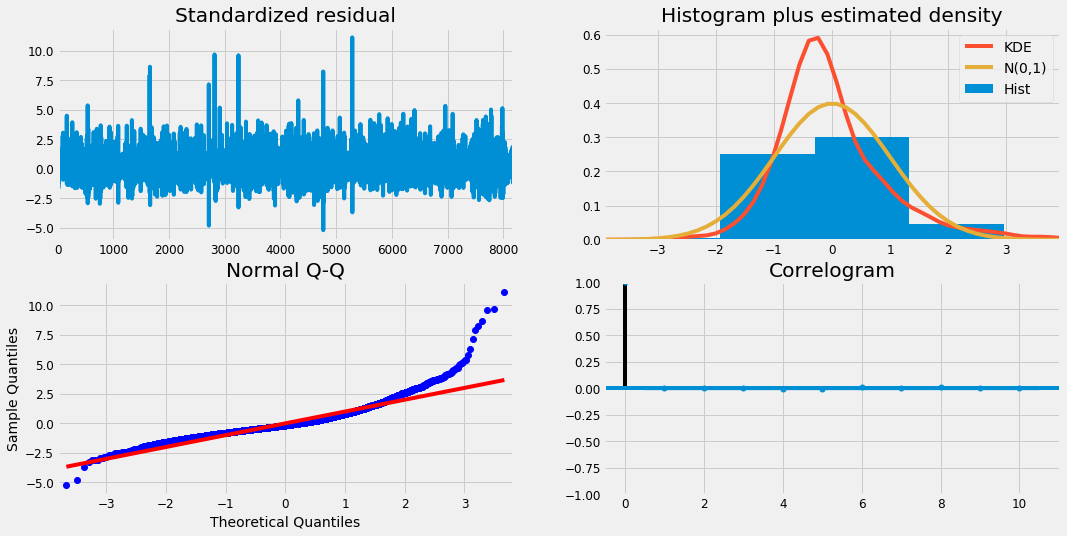

In [67]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

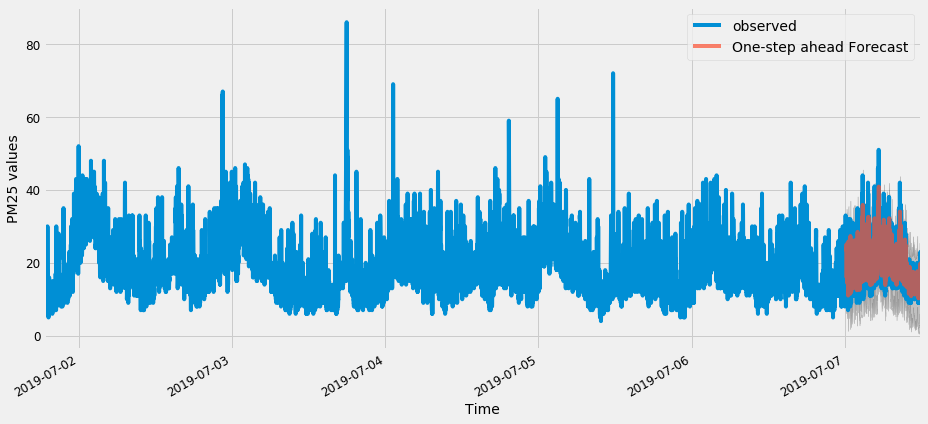

In [98]:
pred = results.get_prediction(start='2019-07-07 00:14:34', dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time')
ax.set_ylabel('PM25 values')
plt.legend()
plt.show()

In [99]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-07-07 00:14:34':]
mse = ((y_forecasted - y_truth) ** 2).mean()


The Mean Squared Error of our forecasts is 28.7


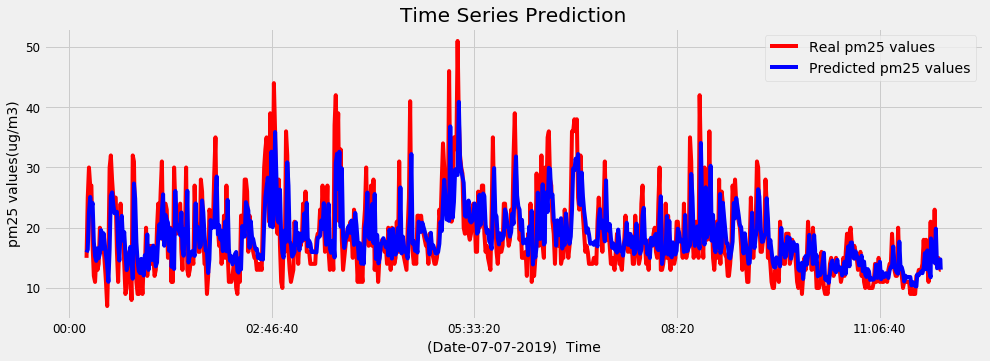

The Mean Squared Error of our forecasts is 28.7


In [102]:
plt.figure(figsize=(15,5))
plt.plot(test_xcoord,y_truth, color = 'red', label = 'Real pm25 values')
plt.plot(test_xcoord,y_forecasted, color = 'blue', label = 'Predicted pm25 values')
plt.title('Time Series Prediction')
plt.xlabel('(Date-07-07-2019)  Time')
plt.ylabel('pm25 values(ug/m3)')
plt.legend()
plt.show()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [101]:
pd.to_datetime(1562458474000,unit='ms')

Timestamp('2019-07-07 00:14:34')